In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\mohit\Downloads\NCRB_Table_1A.1 (1).csv")
df.head()
df.columns

Index(['Sl. No.', 'State/UT', '2020', '2021', '2022',
       'Mid-Year Projected Population (in Lakhs) (2022)',
       'Rate of Cognizable Crimes (IPC) (2022)', 'Chargesheeting Rate (2022)'],
      dtype='object')

In [2]:
df.rename(columns={
    "Mid-Year Projected Population (in Lakhs) (2022)": "Population_2022",
    "Rate of Cognizable Crimes (IPC) (2022)": "Crime_Rate_2022",
    "Chargesheeting Rate (2022)": "Chargesheet_Rate_2022"
}, inplace=True)

In [3]:
for col in ["2020", "2021", "2022", "Population_2022"]:
    df[col] = df[col].astype(str).str.replace(",", "")
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna()
df.head()

,Sl. No.,State/UT,2020,2021,2022,Population_2022,Crime_Rate_2022,Chargesheet_Rate_2022
0,1,Andhra Pradesh,188997,179611,158547,530.3,299.0,86.5
1,2,Arunachal Pradesh,2244,2626,2308,15.5,148.8,47.2
2,3,Assam,111558,119883,59315,354.9,167.1,32.6
3,4,Bihar,194698,186006,211079,1255.3,168.1,75.4
4,5,Chhattisgarh,65216,70519,73822,299.5,246.5,80.4


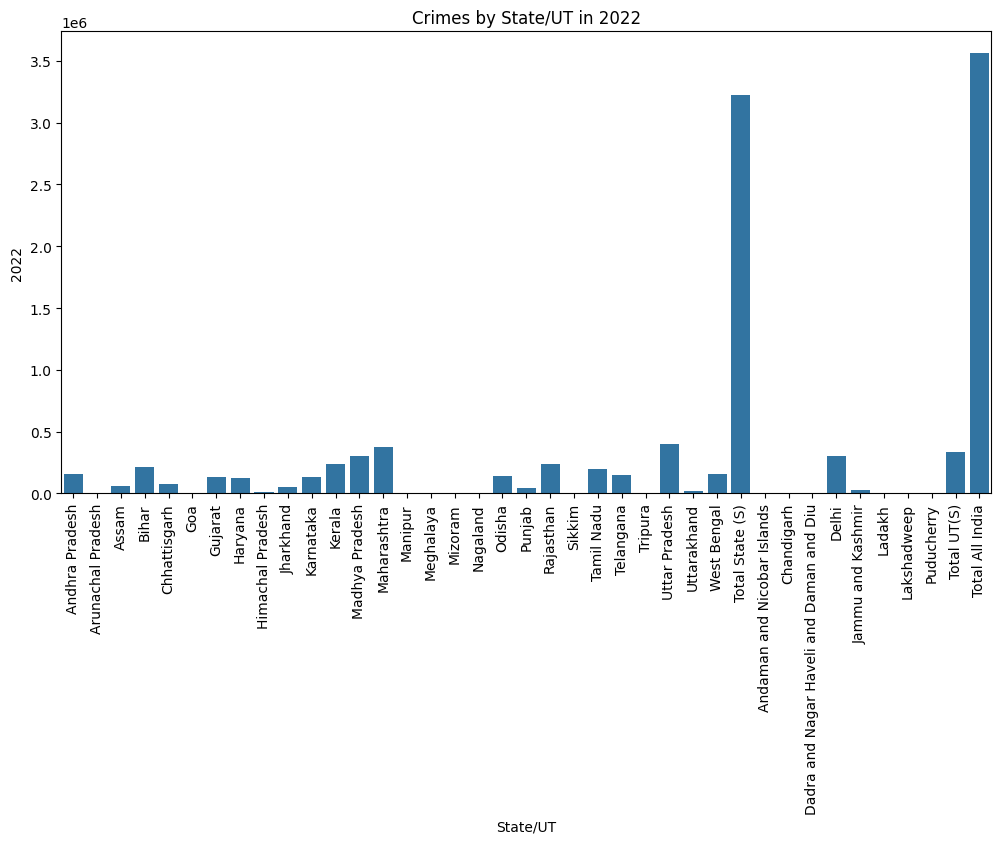

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x="State/UT", y="2022", data=df)
plt.xticks(rotation=90)
plt.title("Crimes by State/UT in 2022")
plt.show()


In [5]:
X = df[["2020", "2021", "Population_2022"]]
y = df["2022"]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 3014778514.9001126
R2 Score: 0.7833442834405872


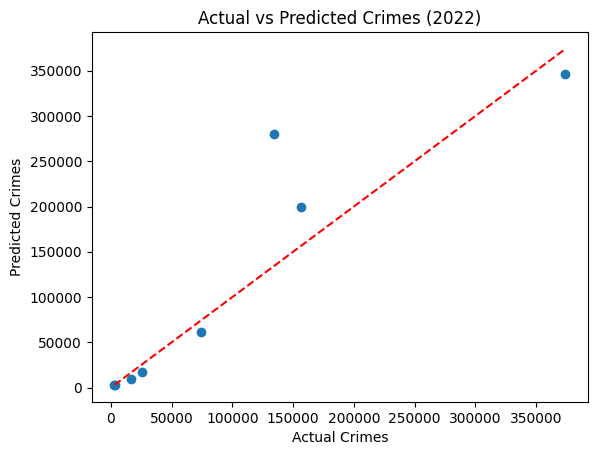

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Crimes")
plt.ylabel("Predicted Crimes")
plt.title("Actual vs Predicted Crimes (2022)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


In [10]:
import pandas as pd

future_data = pd.DataFrame([[500000, 520000, 350]],
                           columns=["2020", "2021", "Population_2022"])

prediction = model.predict(future_data)
prediction


array([338297.385])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the test data
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse )




r2 = r2_score(y_test, y_pred)
print("R² Score (Accuracy):", r2)



Mean Squared Error (MSE): 3014778514.9001126
R² Score (Accuracy): 0.7833442834405872


In [12]:
from sklearn.metrics import r2_score

# Predict values
y_pred = model.predict(X_test)

# R² score
r2 = r2_score(y_test, y_pred)

# Convert to percentage
accuracy_percentage = r2 * 100
print("Accuracy (%):", accuracy_percentage)


Accuracy (%): 78.33442834405872
